In [8]:
# Importar as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Desafio 1**: Qual a relação entre as notas das disciplinas de língua portuguesa e matemática do SAEB no Ensino Fundamental Anos Finais no período das 5 últimas avaliações?

In [9]:
# Importar o conjunto de dados com os dados do IDEB nacional de provas realizadas de 2005 a 2021
ideb = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/ideb_reg_2005_2021.csv")

# Selecionar os dados desejados
anos = [2013, 2015, 2017, 2019, 2021]
ideb_efaf = ideb.query("ano == @anos and anos_escolares == 'EFAF'")[["ano", "nota_saeb_matematica", "nota_saeb_lingua_portuguesa"]]
ideb_efaf = ideb_efaf.sort_values("ano")
ideb_efaf.head()

,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa
120,2013,246.08,242.41
123,2013,291.98,280.08
126,2013,232.36,229.52
129,2013,283.20,273.80
132,2013,235.36,235.19


In [10]:
# Definir a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, CINZA6, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#CED4DA', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

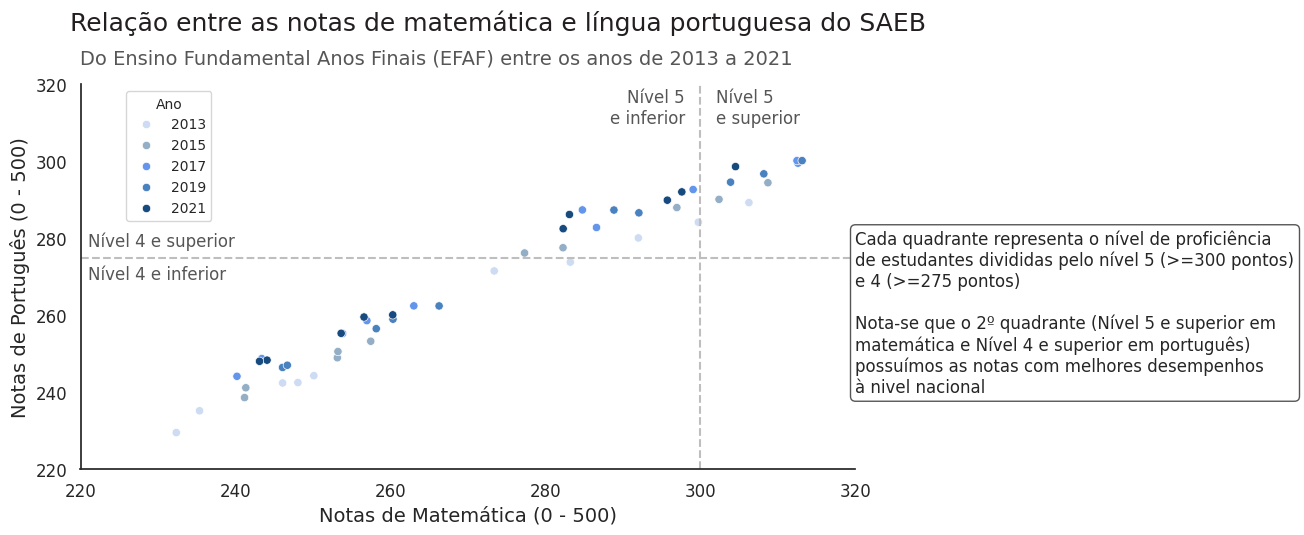

In [11]:
# Definir as cores do gráfico
cores = [AZUL6, AZUL5, AZUL3, AZUL2, AZUL1]

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style="white")

# Gerar o gráfico de dispersão com cores como categorias
ax = sns.scatterplot(data = ideb_efaf, x  = "nota_saeb_matematica", y="nota_saeb_lingua_portuguesa", hue = "ano", palette = cores)

## Personalizar o o gráfico
plt.suptitle('Relação entre as notas de matemática e língua portuguesa do SAEB', size=18, color=CINZA1, ha = 'right', x = 0.97, y = 1.03)
plt.title('Do Ensino Fundamental Anos Finais (EFAF) entre os anos de 2013 a 2021', fontsize=14, color=CINZA3, pad = 15, loc = "left")
ax.legend(bbox_to_anchor=(225, 320), title='Ano', title_fontsize  = 10, fontsize = 10, loc='upper left', bbox_transform=ax.transData)
ax.set_xlabel('Notas de Matemática (0 - 500)',  fontsize = 14)
ax.set_ylabel('Notas de Português (0 - 500)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.set_xlim(220, 320)
ax.yaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.set_ylim(220, 320)
sns.despine()

# Limites das notas em no eixo y (notas de português) - 275 pontos (proficiência)
ax.text(ax.get_xlim()[0] + 1, 277, 'Nível 4 e superior', fontsize=12, color = CINZA3, va = "bottom")
ax.text(ax.get_xlim()[0] + 1 , 273, 'Nível 4 e inferior', fontsize=12, color = CINZA3, va = "top")
plt.axhline(y = 275, color = CINZA5, linestyle='--')

# Limites das notas em no eixo x (notas de matemática) - 300 pontos (proficiência)
ax.text(298, ax.get_ylim()[1] - 10, 'Nível 5\ne inferior', fontsize=12, color = CINZA3, ha="right")
ax.text(302, ax.get_ylim()[1] - 10, 'Nível 5\ne superior', fontsize=12, color = CINZA3, ha="left")
plt.axvline(x = 300, color = CINZA5, linestyle='--')

# Adicionar um texto explicando a divisão de quadrantes e o que significa
ax.annotate("Cada quadrante representa o nível de proficiência\nde estudantes divididas pelo nível 5 (>=300 pontos)\ne 4 (>=275 pontos)\n\n"
            "Nota-se que o 2º quadrante (Nível 5 e superior em \nmatemática e Nível 4 e superior em português)\n"
            "possuímos as notas com melhores desempenhos \nà nivel nacional", xy=(320, 240), xycoords='data',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            xytext=(0, 0), textcoords='offset points')

plt.show()

**Desafio 2**: Qual seria a relação entre as notas do SAEB no Ensino Médio? Conseguimos notar como as duas se comportam em relação a taxa de aprovação e as regiões?

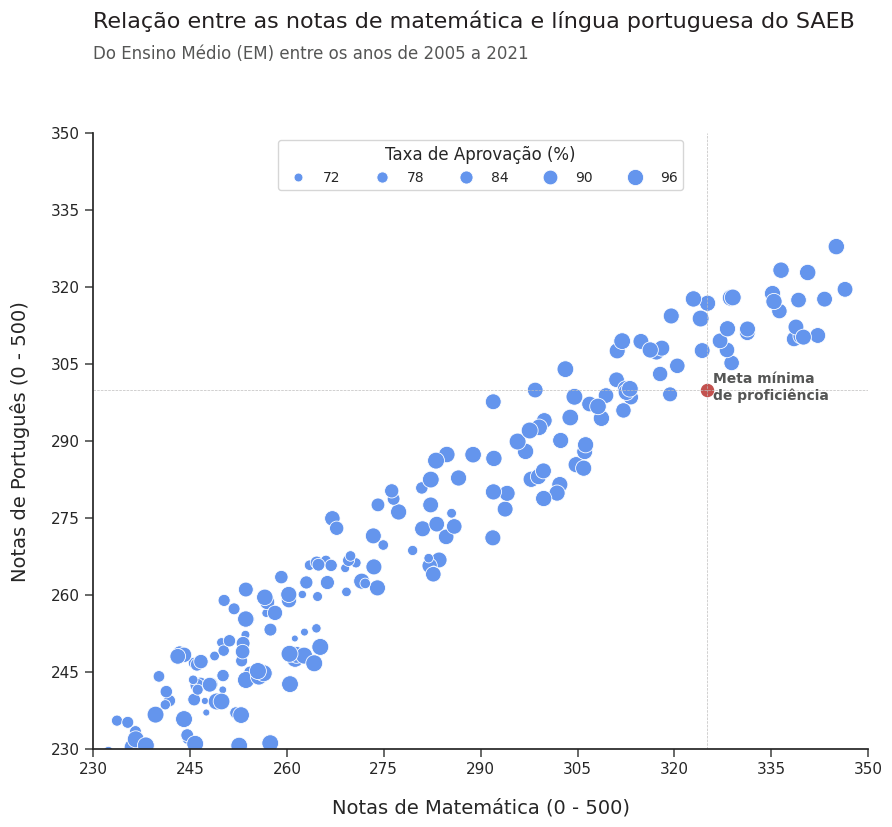

In [12]:
# Importar o conjunto de dados com os dados do IDEB nacional de provas realizadas de 2005 a 2021
ideb_em = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/ideb_reg_2005_2021.csv")

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,8))

# Gerar o gráfico de bolhas
ax = sns.scatterplot(data = ideb_em, x = "nota_saeb_matematica", y = "nota_saeb_lingua_portuguesa",
                     size = "taxa_aprovacao", sizes=(20, 150), color = AZUL3)

# Adicionar a nota meta de proficiência - https://academia.qedu.org.br/prova-brasil/aprendizado-adequado/?repeat=w3tc
ax.scatter([325], [300], color=VERMELHO1, s=75)
plt.axvline(x = 325, color = CINZA5, linestyle='--', linewidth=0.5)
plt.axhline(y = 300, color = CINZA5, linestyle='--', linewidth=0.5)
ax.text(326, 298, 'Meta mínima\nde proficiência', color=CINZA3, fontsize=10, fontweight='bold')

# Personalizar o gráfico
plt.suptitle('Relação entre as notas de matemática e língua portuguesa do SAEB', size=16,
             color=CINZA1, ha = 'left', x = 0, y = 1.2, transform=ax.transAxes)
plt.title('Do Ensino Médio (EM) entre os anos de 2005 a 2021', fontsize=12,
          color=CINZA3, ha = "left", x = 0, y = 1.12, transform=ax.transAxes)
ax.legend(loc = 'upper center', fontsize = 10, title="Taxa de Aprovação (%)", ncols = 5,
          bbox_transform=ax.transData)
sns.despine()

# Propriedades dos eixos x e y
ax.set_xlim(230, 350)
ax.set_ylim(230, 350)

plt.setp(ax, xticks=np.arange(230, 351, 15), yticks=np.arange(230, 351, 15))

# Ajustar a aparência dos ticks e tick labels
ax.tick_params(bottom=True, left=True)
ax.xaxis.set_tick_params(labelsize=11, color = CINZA3)
ax.yaxis.set_tick_params(labelsize=11, color = CINZA3)
ax.set_xlabel('Notas de Matemática (0 - 500)', fontsize = 14, labelpad = 15)
ax.set_ylabel('Notas de Português (0 - 500)', fontsize = 14, labelpad = 15)

plt.show()